## <div align="center"> ANALISIS POLA PEMBELIAN PADA DATA E-COMMERCE DENGAN ALGORITMA APRIORI </div>

#### **Kelompok 2**
*   Christopher Abie Diaz Doviano (00000067692)
*   Jovanka Suryajaya (00000069834)
*   Juanito Arvin William (00000069843)
*   Julius Calvin Saputra (00000068626)

---

#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# associative learning libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Membaca dataset 1
de=pd.read_csv('Order Details.csv')
de

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [3]:
# Membaca dataset 2
li=pd.read_csv('List of Orders.csv')
li

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN


In [4]:
# Melihat Tipe Data dataframe de
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [5]:
# Melihat Tipe Data dataframe li
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


### **Data Preparation**

In [6]:
# Cek Missing Value de
de.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [7]:
# Cek Missing Value li
li.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [8]:
# Menghapus Missing Value dataframe de
de = de.dropna()
de

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [9]:
# Menghapus Missing Value dataframe li
li = li.dropna()
li

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
495,B-26096,28-03-2019,Atharv,West Bengal,Kolkata
496,B-26097,28-03-2019,Vini,Karnataka,Bangalore
497,B-26098,29-03-2019,Pinky,Jammu and Kashmir,Kashmir
498,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai


In [10]:
# Menggabungkan kedua dataframe
order = pd.merge(de, li, on='Order ID')
order

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019,Bhishm,Maharashtra,Mumbai
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


In [11]:
# Drop kolom yang tidak digunakan
order = order.drop(['CustomerName', 'State', 'City'], axis=1)
order

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018
...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019


In [12]:
# Mengurutkan Kolom
order_date_index = order.columns.get_loc('Order Date')
order.insert(1, 'Order Date', order.pop('Order Date'))
order

,Order ID,Order Date,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...
1495,B-26099,30-03-2019,835.0,267.0,5,Electronics,Phones
1496,B-26099,30-03-2019,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,31-03-2019,828.0,230.0,2,Furniture,Chairs
1498,B-26100,31-03-2019,34.0,10.0,2,Clothing,T-shirt


In [13]:
# Cek Tipe Data Dataframe Baru
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   Amount        1500 non-null   float64
 3   Profit        1500 non-null   float64
 4   Quantity      1500 non-null   int64  
 5   Category      1500 non-null   object 
 6   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 82.2+ KB


Karena Order Date masih dalam bentuk object, maka perlu dilakukan pengubahan tipe data menjadi datetime.

In [14]:
# Mengubah tipe dapa
order['Order Date'] = pd.to_datetime(order['Order Date'], format='%d-%m-%Y')

In [15]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   Amount        1500 non-null   float64       
 3   Profit        1500 non-null   float64       
 4   Quantity      1500 non-null   int64         
 5   Category      1500 non-null   object        
 6   Sub-Category  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 82.2+ KB


In [16]:
# Manipulasi dan Ekstrak Data Hari dan Bulan

# Bulan
order['month'] = order['Order Date'].dt.month
order['month'] = order['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
'September', 'October', 'November', 'December'))

# Hari
order['weekday'] = order['Order Date'].dt.weekday
order['weekday'] = order['weekday'].replace((0,1,2, 3,4, 5,6),
('Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday'))

order

,Order ID,Order Date,Amount,Profit,Quantity,Category,Sub-Category,month,weekday
0,B-25601,2018-04-01,1275.0,-1148.0,7,Furniture,Bookcases,April,Sunday
1,B-25601,2018-04-01,66.0,-12.0,5,Clothing,Stole,April,Sunday
2,B-25601,2018-04-01,8.0,-2.0,3,Clothing,Hankerchief,April,Sunday
3,B-25601,2018-04-01,80.0,-56.0,4,Electronics,Electronic Games,April,Sunday
4,B-25602,2018-04-01,168.0,-111.0,2,Electronics,Phones,April,Sunday
...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,835.0,267.0,5,Electronics,Phones,March,Saturday
1496,B-26099,2019-03-30,2366.0,552.0,5,Clothing,Trousers,March,Saturday
1497,B-26100,2019-03-31,828.0,230.0,2,Furniture,Chairs,March,Sunday
1498,B-26100,2019-03-31,34.0,10.0,2,Clothing,T-shirt,March,Sunday


In [17]:
# Mengurutkan Kolom
order_date_index = order.columns.get_loc('Order Date')
order.insert(order_date_index + 1, 'month', order.pop('month'))
order.insert(order_date_index + 2, 'weekday', order.pop('weekday'))
order

,Order ID,Order Date,month,weekday,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,April,Sunday,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-04-01,April,Sunday,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-04-01,April,Sunday,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-04-01,April,Sunday,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-04-01,April,Sunday,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,March,Saturday,835.0,267.0,5,Electronics,Phones
1496,B-26099,2019-03-30,March,Saturday,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,2019-03-31,March,Sunday,828.0,230.0,2,Furniture,Chairs
1498,B-26100,2019-03-31,March,Sunday,34.0,10.0,2,Clothing,T-shirt


### **Exploratory Data Analysis**

In [18]:
# Menampilkan Statistik Umum
order.describe()

,Order Date,Amount,Profit,Quantity
count,1500,1500.000000,1500.000000,1500.000000
mean,2018-10-23 14:00:57.600000,287.668000,15.970000,3.743333
min,2018-04-01 00:00:00,4.000000,-1981.000000,1.000000
25%,2018-07-26 18:00:00,45.000000,-9.250000,2.000000
50%,2018-11-08 00:00:00,118.000000,9.000000,3.000000
75%,2019-01-27 00:00:00,322.000000,38.000000,5.000000
max,2019-03-31 00:00:00,5729.000000,1698.000000,14.000000
std,NaN,461.050488,169.140565,2.184942


#### Visualisasi

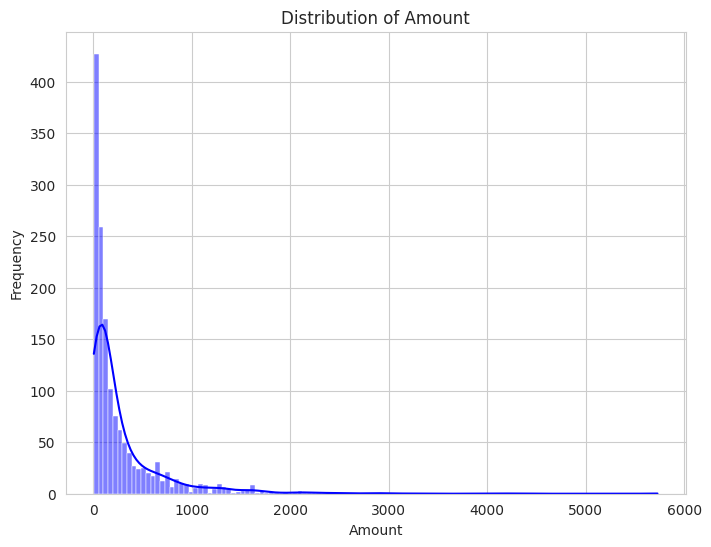

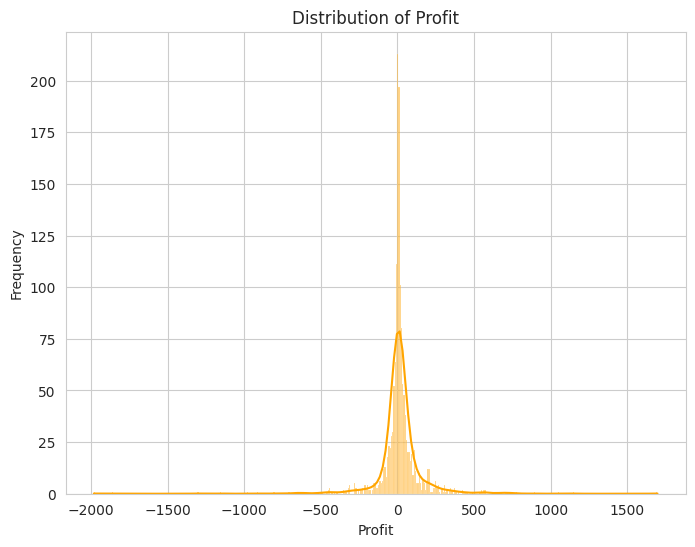

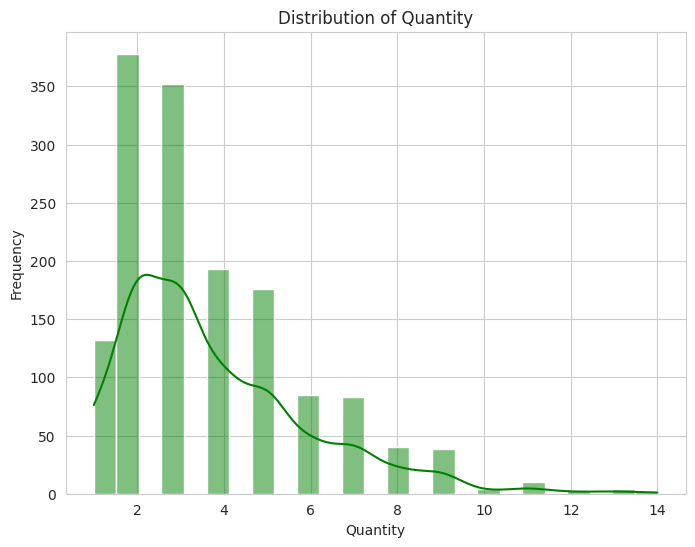

In [19]:
sns.set_style("whitegrid")

# Distribusi Variabel Amount
plt.figure(figsize=(8, 6))
sns.histplot(data=order, x='Amount', kde=True, color='blue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Distribusi Variabel Profit
plt.figure(figsize=(8, 6))
sns.histplot(data=order, x='Profit', kde=True, color='orange')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Distribusi Variabel Quantity
plt.figure(figsize=(8, 6))
sns.histplot(data=order, x='Quantity', kde=True, color='green')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

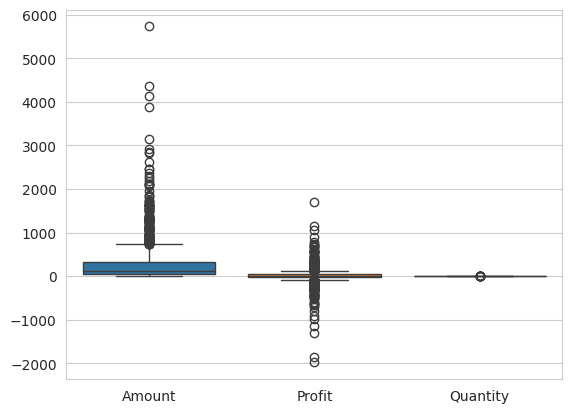

In [20]:
# Cek Outlier Variabel Numerik
sns.boxplot(data=order)
plt.show()

Dalam penelitian ini, tidak akan dilakukan penghapusan outlier pada data numerik karena data tersebut kemungkinan memiliki informasi mengenai pola atau asosiasi yang bermakna, sehingga dapat berpengaruh terhadap hasil analisis.

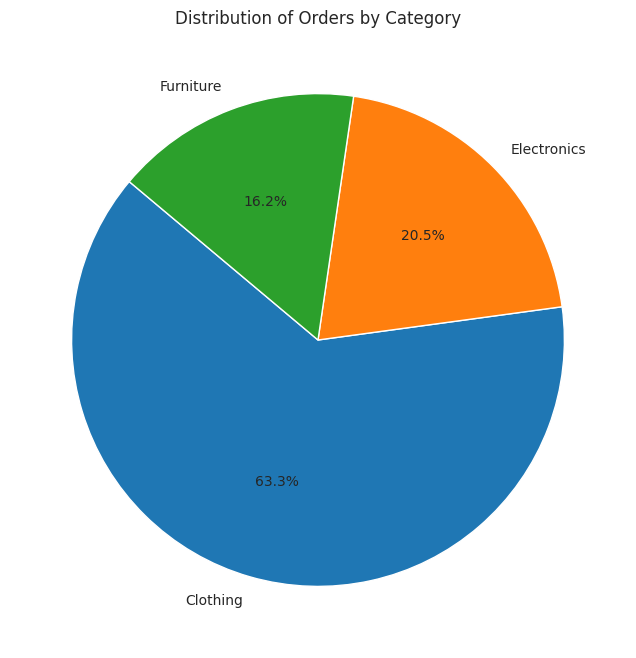

In [21]:
# Distribusi Order berdasarkan Kategori
category_counts = order['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Category')
plt.show()

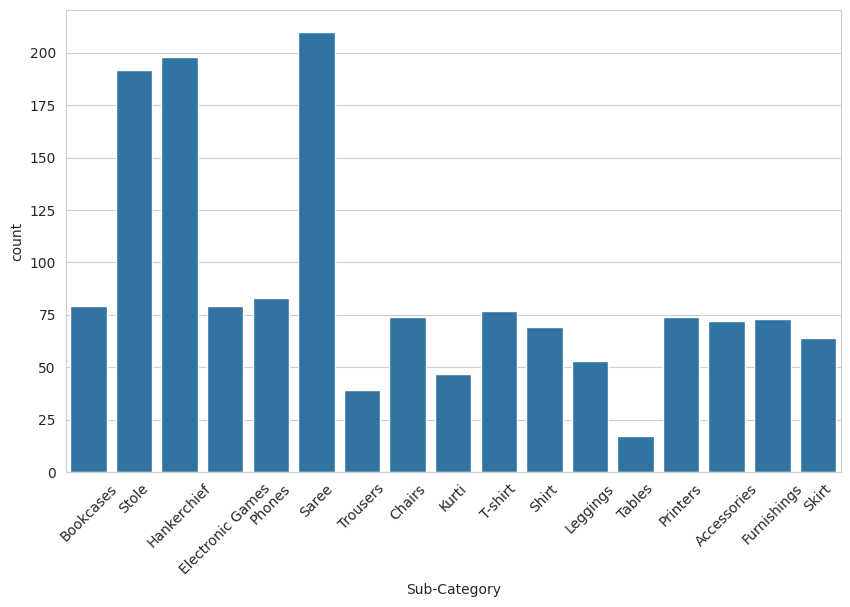

In [22]:
# Count plot untuk Variabel Kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(data=order, x='Sub-Category')
plt.xticks(rotation=45)
plt.show()

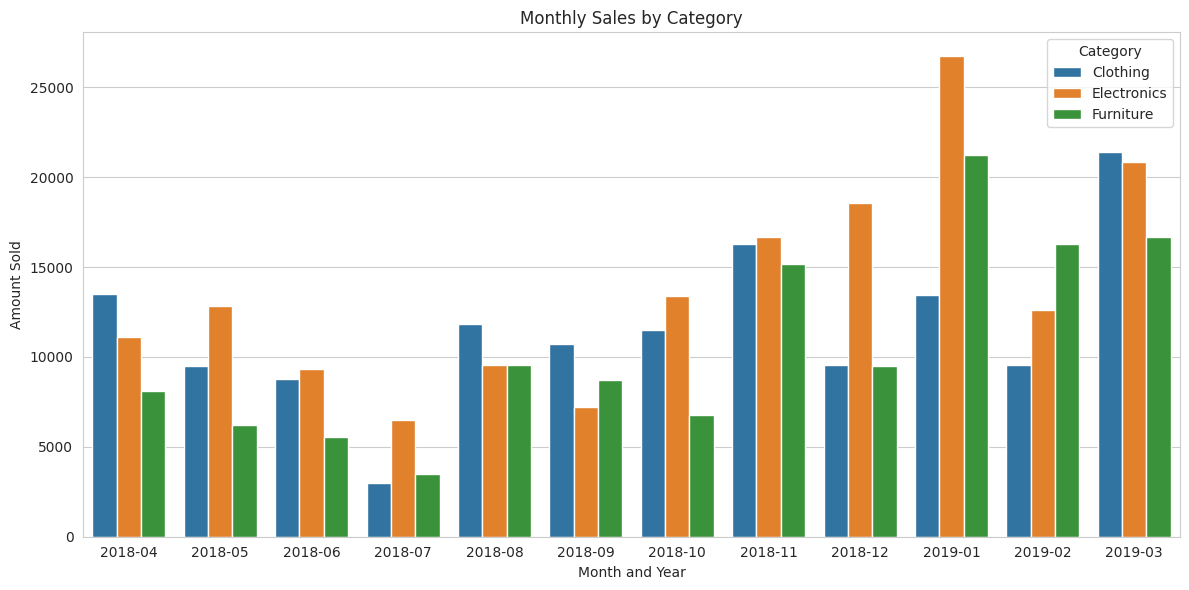

In [23]:
# Bar Plot Penjualan Bulanan berdasarkan Kategori
order['month_year'] = order['Order Date'].dt.strftime('%Y-%m')
monthly_sales = order.groupby(['month_year', 'Category'])['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month_year', y='Amount', hue='Category')
plt.title('Monthly Sales by Category')
plt.xlabel('Month and Year')
plt.ylabel('Amount Sold')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

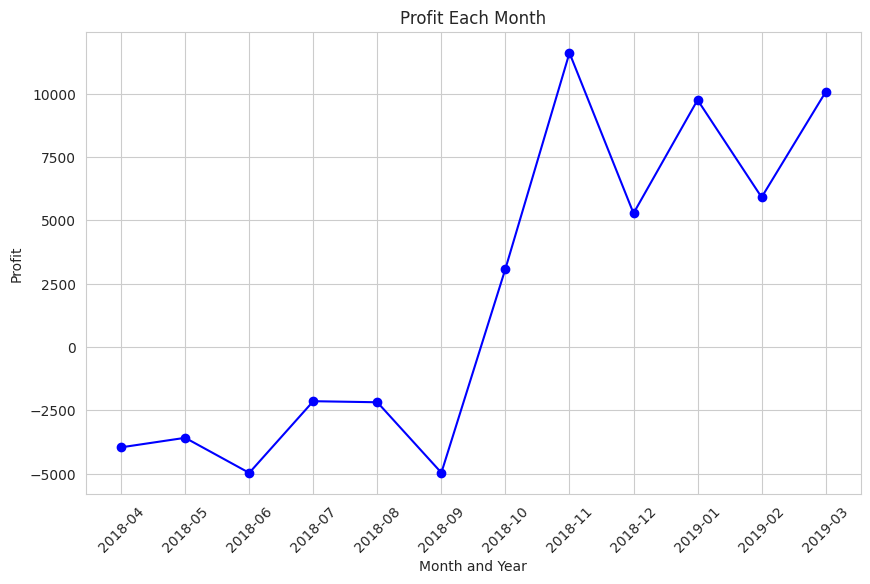

In [24]:
# Line Chart Profit setiap Bulan
monthly_profit = order.groupby('month_year')['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit['month_year'], monthly_profit['Profit'], marker='o', color='b', linestyle='-')
plt.title('Profit Each Month')
plt.xlabel('Month and Year')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

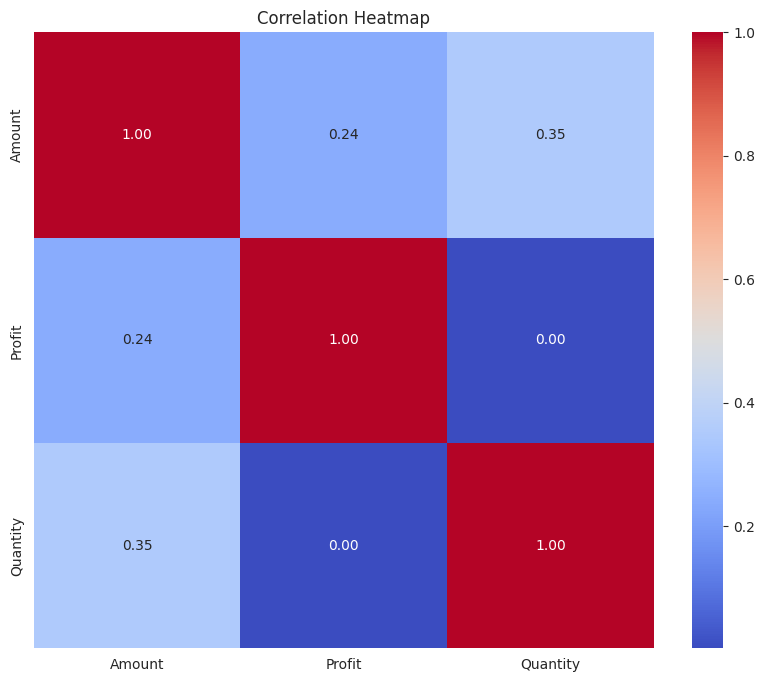

In [25]:
# Heatmap Korelasi
numeric=order[['Amount','Profit','Quantity']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Kolom Quantity dengan Amount memiliki korelasi positif yang lemah. Hal ini dibuktikan dengan nilai korelasi sebesar 0.35, yang lebih mendekati 0 dibanding 1.
- Kolom Profit dengan Amount memiliki korelasi positif yang lemah karena memiliki nilai korelasi sebesar 0.24.

### **Rekayasa Fitur**

In [26]:
# Transformasi data ke dalam format True/False
grouped = order.groupby('Order ID')['Sub-Category'].apply(list)
transactions = grouped.tolist()
unique_items = list(set(item for sublist in transactions for item in sublist))
df = pd.DataFrame(index=range(len(transactions)), columns=unique_items)
for i, transaction in enumerate(transactions):
    for item in transaction:
        df.at[i, item] = True
df = df.fillna(False)
df.insert(0, 'Transaction_ID', range(len(df)))
df.head()

,Transaction_ID,Tables,Bookcases,Electronic Games,Trousers,Printers,Shirt,Furnishings,Saree,Leggings,Chairs,Accessories,T-shirt,Hankerchief,Kurti,Skirt,Stole,Phones
0,0,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,2,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,True,False
3,3,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


### **Pemodelan Data dan Evaluasi**

### Pembanding 1 (Min. Support 0.01)

In [27]:
# Pemodelan Apriori Pembanding 1
frequent_itemsets1 = apriori(df.drop(columns=['Transaction_ID']), min_support=0.01, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets']. apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.032,(Tables),1
1,0.144,(Bookcases),1
2,0.146,(Electronic Games),1
3,0.074,(Trousers),1
4,0.134,(Printers),1
...,...,...,...
329,0.010,"(Saree, Stole, Accessories, Phones)",4
330,0.010,"(T-shirt, Saree, Stole, Phones)",4
331,0.010,"(Hankerchief, Saree, Stole, Phones)",4
332,0.010,"(T-shirt, Hankerchief, Stole, Accessories)",4


In [28]:
# Pembatasan Panjang Itemset
frequent_itemsets1 = frequent_itemsets1[(frequent_itemsets1['length'] <= 3)]
frequent_itemsets1

,support,itemsets,length
0,0.032,(Tables),1
1,0.144,(Bookcases),1
2,0.146,(Electronic Games),1
3,0.074,(Trousers),1
4,0.134,(Printers),1
...,...,...,...
288,0.018,"(Hankerchief, Kurti, Stole)",3
289,0.012,"(Hankerchief, Kurti, Phones)",3
290,0.014,"(Hankerchief, Stole, Skirt)",3
291,0.016,"(Hankerchief, Stole, Phones)",3


In [29]:
# Aturan Asosiasi Pembanding 1
rules1 = association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.75)
rules_sorted1 = rules1.sort_values(by='confidence', ascending=False)
rules_filtered1 = rules_sorted1.loc[:, 'antecedents':'lift']
rules_filtered1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
3,"(Furnishings, Kurti)",(Hankerchief),0.012,0.276,0.010,0.833333,3.019324
2,"(T-shirt, Shirt)",(Stole),0.022,0.314,0.018,0.818182,2.605675
1,"(T-shirt, Electronic Games)",(Stole),0.018,0.314,0.014,0.777778,2.476999
0,"(Bookcases, Skirt)",(Saree),0.016,0.312,0.012,0.750000,2.403846
4,"(Accessories, Chairs)",(Saree),0.016,0.312,0.012,0.750000,2.403846


### Pembanding 2 (Min. Support 0.07)

In [30]:
# Pemodelan Data Pembanding 2
frequent_itemsets2 = apriori(df.drop(columns=['Transaction_ID']), min_support=0.07, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets']. apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.144,(Bookcases),1
1,0.146,(Electronic Games),1
2,0.074,(Trousers),1
3,0.134,(Printers),1
4,0.132,(Shirt),1
5,0.132,(Furnishings),1
6,0.312,(Saree),1
7,0.098,(Leggings),1
8,0.128,(Chairs),1
9,0.130,(Accessories),1


In [31]:
# Aturan Asosiasi Pembanding 2
rules2 = association_rules(frequent_itemsets2, metric='confidence', min_threshold=0.2)
rules_sorted2 = rules2.sort_values(by='confidence', ascending=False)
rules_filtered2 = rules_sorted2.loc[:, 'antecedents':'lift']
rules_filtered2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
4,(Hankerchief),(Stole),0.276,0.314,0.118,0.427536,1.361580
5,(Stole),(Hankerchief),0.314,0.276,0.118,0.375796,1.361580
2,(Saree),(Stole),0.312,0.314,0.116,0.371795,1.184060
3,(Stole),(Saree),0.314,0.312,0.116,0.369427,1.184060
0,(Hankerchief),(Saree),0.276,0.312,0.092,0.333333,1.068376
1,(Saree),(Hankerchief),0.312,0.276,0.092,0.294872,1.068376


## <div align="center"> CONCLUSION </div>
---

Berdasarkan kedua aturan asosiasi yang telah dilakukan, terlihat bahwa aturan asosiasi pertama (minimum support 0.01) memiliki nilai minimum confidence yang lebih tinggi, serta support yang masih cukup tinggi dengan minimum support 0.01. Aturan asosiasi ini menunjukkan hubungan yang kuat antara barang-barang yang dibeli bersama dalam transaksi, dengan confidence di atas 75% dan lift yang tinggi, menunjukkan relevansi yang signifikan. Sementara itu, aturan asosiasi kedua (minimum support 0.07) menggunakan nilai minimum confidence yang lebih rendah, dan meskipun support yang lebih tinggi dengan minimum support 0.05, confidence dan lift yang dihasilkan cenderung lebih rendah. Hal ini menunjukkan bahwa aturan asosiasi pembanding kedua kurang kuat dan memiliki dampak yang lebih rendah dalam memprediksi pola pembelian pelanggan. Pilihan minimum support 0.01 untuk aturan asosiasi pertama digunakan untuk menemukan hubungan yang kuat dan spesifik antara sub-kategori produk, sementara minimum support 0.07 digunakan pada aturan asosiasi kedua untuk melihat pola pembelian yang lebih umum dan luas.